#  Prosper Loan Data
## by Carolyn Cherono

## Introduction
This data set contains information on  loans facilitated by credit company Prosper 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
df.shape

(113937, 81)

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?
I am more interested in finding out factors which affect borrowing

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Employment status, Occupation, House Ownership, Monthly income, Prosper Rating

## Univariate Exploration


# What is the highest Loan status

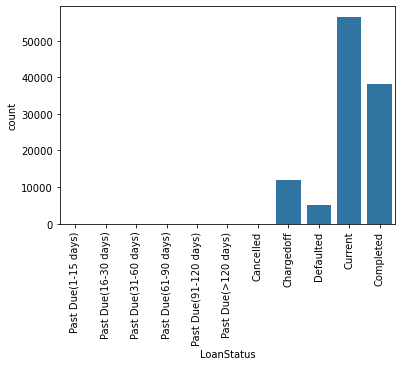

In [7]:
# setting color
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanStatus',order=['Past Due(1-15 days)','Past Due(16-30 days)',
                                                'Past Due(31-60 days)','Past Due(61-90 days)',
                                                'Past Due(91-120 days)','Past Due(>120 days)','Cancelled','Chargedoff',
                                                'Defaulted','Current','Completed'], color = base_color);
plt.xticks(rotation=90);

# Observation
Current loans are the highest loans, followed by completed then charged off.

# What is the employment status of the borrowers

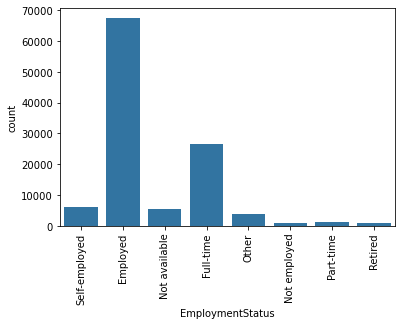

In [8]:
sb.countplot(data = df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

# Observation
Majority of the people with loans are employed.

# What is home ownership in relation to borrowing

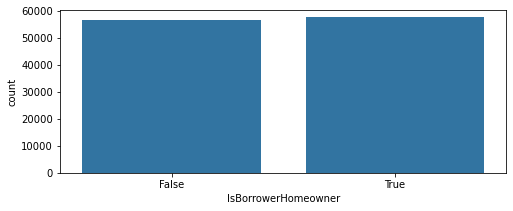

In [9]:
plt.figure(figsize=(8,3))
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color);


# Observation
People who do not own homes are majority of the borrowers

# Are majority of the borrowers in groups or not

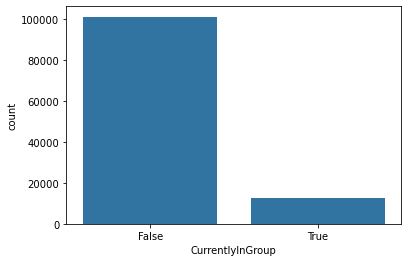

In [10]:
sb.countplot(data = df, x = 'CurrentlyInGroup', color = base_color);

# Observation
People who are not in groups are higher than those in groups. We can make assumptions that those in grouos might be borrowing from each other.


# What is the distribution of Stated Monthly Income

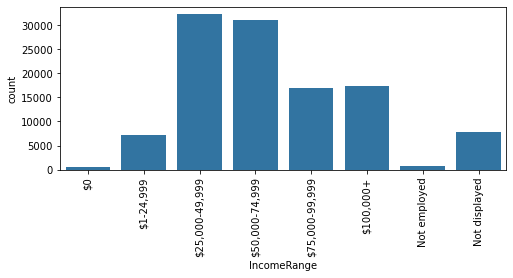

In [11]:
plt.figure(figsize=(8,3))
sb.countplot(data = df, x = 'IncomeRange', color = base_color,order=['$0','$1-24,999','$25,000-49,999',
                                                                    '$50,000-74,999','$75,000-99,999','$100,000+',
                                                                     'Not employed','Not displayed']);
plt.xticks(rotation = 90);

# Observation
Highest borrowers earn between 25,000 dollars and 49,999 dollars. Those who do not earn anything and unemployed are the least borrowers.

# What is the year and month with most borrowers

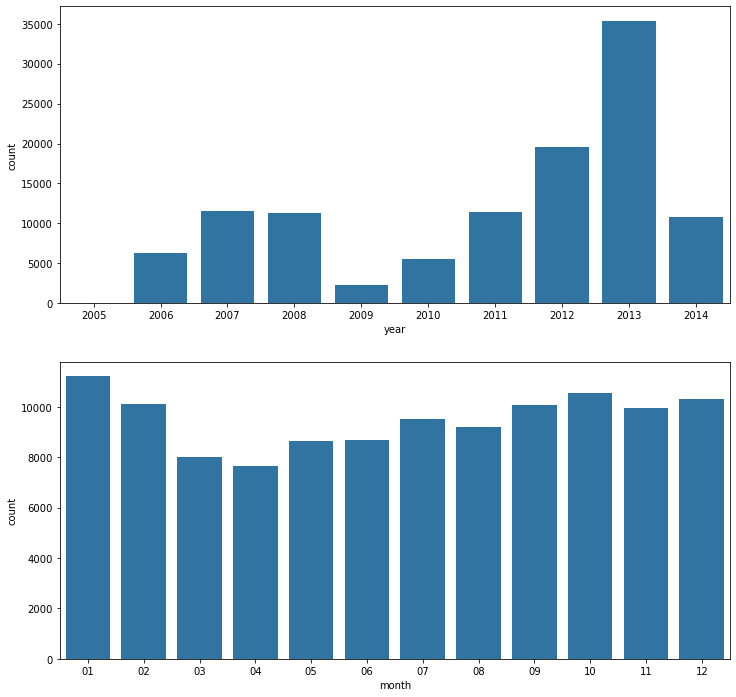

In [12]:
# Splitting ListingCreationDate column into year,month,day,time
df['year']=df['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df['month'] = df['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)
# countplots of loans listed year, month and day of the month wise
fig, ax = plt.subplots(nrows=2, figsize = [12,12])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'year', color = base_color,order=['2005','2006','2007','2008','2009','2010',
                                                              '2011','2012','2013','2014'], ax = ax[0]);
sb.countplot(data = df, x = 'month', color = base_color,order=['01','02','03','04','05','06','07','08','09','10','11','12'], ax = ax[1]);


# Observation
Majority of the borrowings was done in 2008 and 2007, there were little borrowing in 2014 and 2015.
Borrowings across the months are high with month 05 being the highest


# What are the popular occupation of the borrower

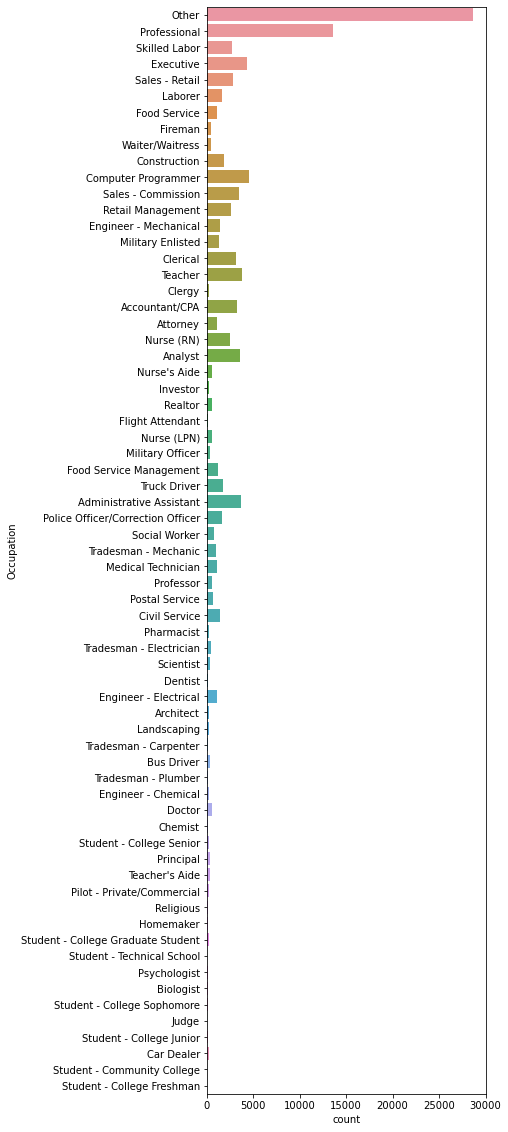

In [13]:
plt.figure(figsize = (5,20))
sb.countplot(data=df,y='Occupation',)
plt.show();

# Observation 
The highest borrowers did not list their occupation, followed by proffesional.



# How is borrower rate distributed.

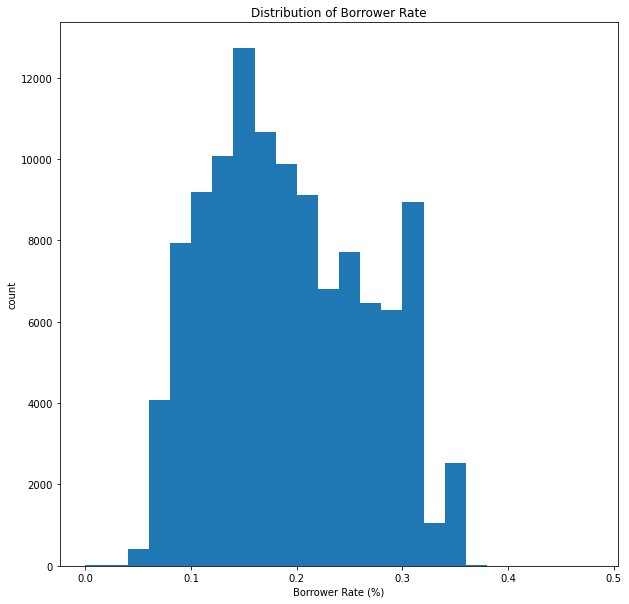

In [14]:
rate = np.arange(df.BorrowerRate.min(), df.BorrowerRate.max(),0.02)

plt.figure(figsize = [10, 10])

plt.hist(data=df, x='BorrowerRate', bins=rate)
plt.xlabel('Borrower Rate (%)');
plt.ylabel('count')
plt.title('Distribution of Borrower Rate');

# Observation
There is a large spike around 0.15

# How numbers are distributed according to states

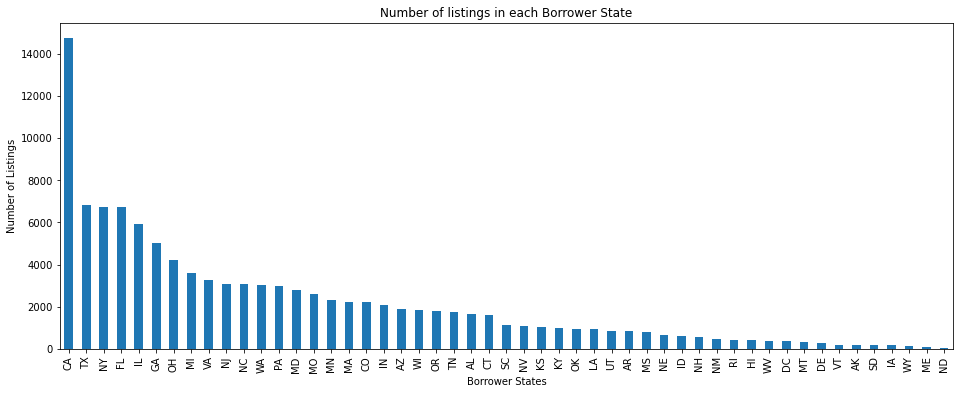

In [15]:
state_count = df.BorrowerState.value_counts()
plt.figure(figsize=(16,6))
state_count.plot(kind='bar');
plt.title('Number of listings in each Borrower State');
plt.xlabel('Borrower States');
plt.ylabel('Number of Listings');
plt.xticks(rotation=90);

# Observation
California has the highest number of borrowers followed by Florida. North Dakota has the least number of borrowers.

## Bivariate Exploration


In [16]:
#Adjust the form of data
condition = (df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Defaulted') |\
                  (df['LoanStatus'] == 'Chargedoff')
df = df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df['LoanStatus'] = df.apply(change_to_defaulted, axis=1)
df['LoanStatus'].value_counts()

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

# Employment status vs Prosper rating

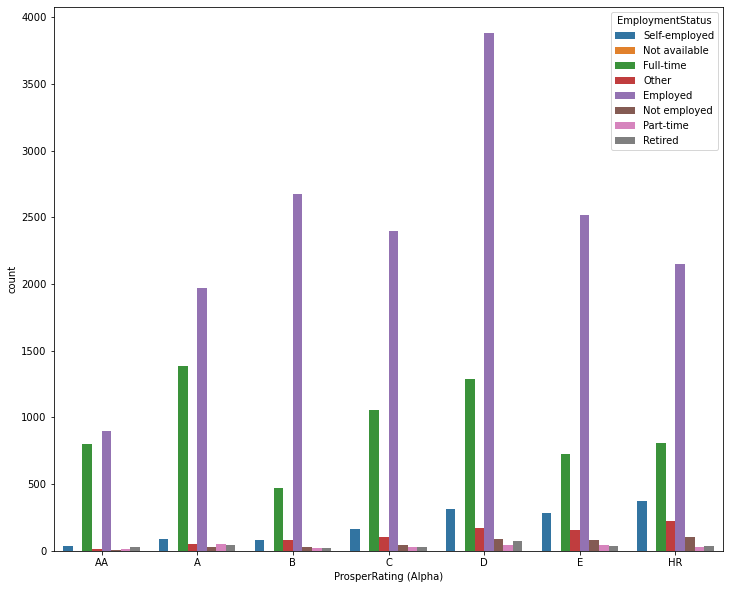

In [17]:
def prospervsemployment():
    plt.figure(figsize = [12, 10])  
    sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus',order=['AA','A','B','C','D','E','HR']);
prospervsemployment()


# Observation
People with rating D and are employed are the highest borrowers.

# Loan Status VS Prosper Rating

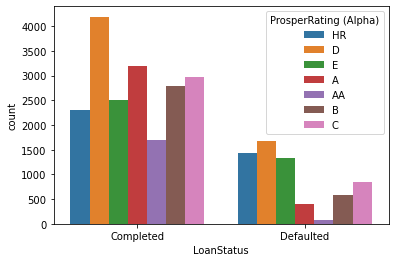

In [18]:
sb.countplot(data = df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)');

# Observation
Borrowers with rating of D are most frequent in both completed and defaulted loans.

# Loan Status and Loan Amount

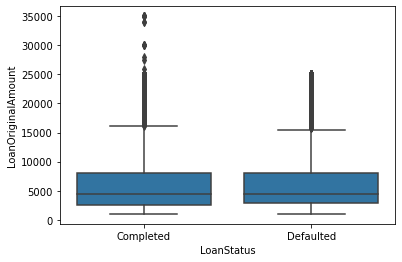

In [19]:
sb.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);

# Observation
Completed loan is greater than defaulted loan

# Relationship between credit status and listing category

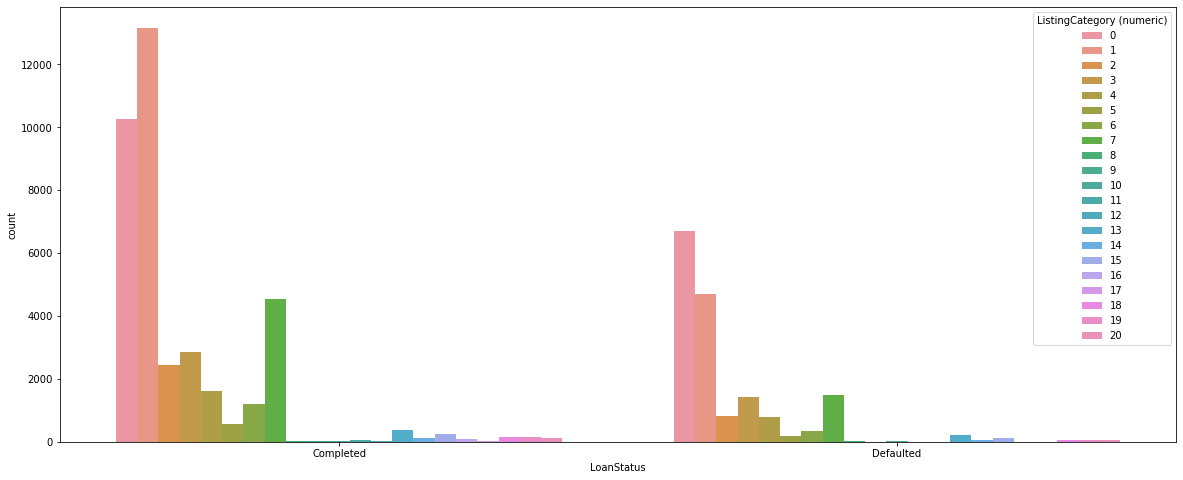

In [20]:
plt.figure(figsize = [20, 8])  
sb.countplot(data = df, x = 'LoanStatus', hue = 'ListingCategory (numeric)');

Listing Category 1 which is debt consolidation is high on completed loans while listing category 0 which is 
Not available is high on defaulted followed by listing category 1. We can make assumption that majority of the borrowers took 
loans to use in consolodiation of debts.

## Multivariate Exploration


# To study the Debt to Income ratio between the Term and House Owner

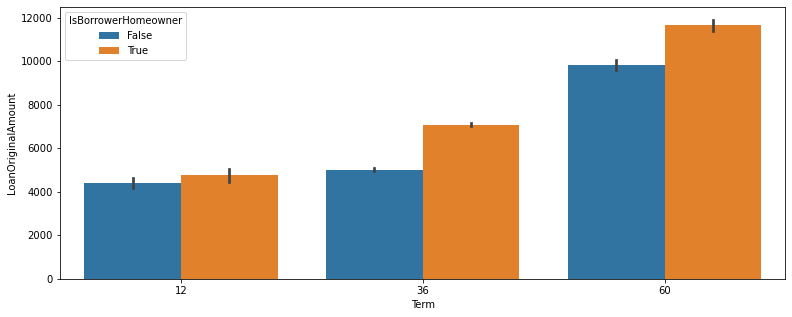

In [21]:
def debttoincome():
    plt.figure(figsize=[13,5])
    sb.barplot(data = df, x = 'Term', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
          )
    plt.show()
debttoincome()


# Observation
From this visualization we can see that people who own homes are majority of the borrowers as opposed to what we saw in univariate, also majority of borrowers have long repayment periods.


# Rating, Loan Amount and Loan Status 

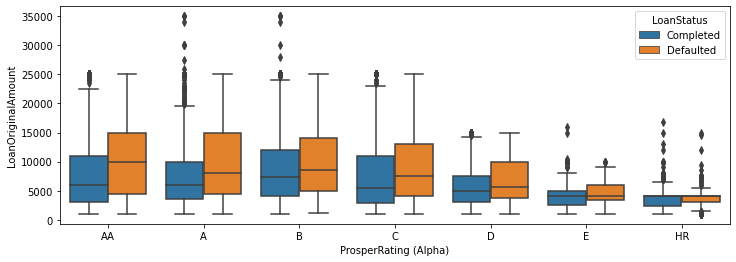

In [22]:
plt.figure(figsize = [12, 4])
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',order=['AA','A','B','C','D','E','HR']);

# Observation
HR has the least loan with almost half being completed.

## Conclusions
>Current loans are the highest loans.
>Employed people are the highest borrowers
>Majority of the borrowers are not in group
>Professional are the second largest borrowers.
>California has the highest borrowers

